In [98]:
import matplotlib.pyplot as plt
import math
import random

In [99]:
# モデルのパラメータ
b0 = 1*10**(-7)
b1 = 2*b0
c = 1.3*10
B = 1
gamma=200
a0=0.01
a1=1.75*a0

# 初期値
x = 1*10**8

# 目安
z2=(c/x - b0) / (b1 - b0)
y2 =( ((1-z2)/z2) *B*(1+gamma*z2**2) - a0)/a1

print(y2, z2)

2532.7619047619046 0.30000000000000004


In [100]:
z0 = (c - b0*x)/((b1-b0)*x)
sigma = B*gamma/((b1-b0)*x)
lamda = a0/(B*gamma)
ky = a1/(B*gamma)

print(z0, sigma,lamda)

0.3 20.0 5e-05


In [101]:
# 初期値
# x = 1*10**8
# y = 2500*ky*random.random()
# z = random.random()
y = 2500*ky*random.random()
z = random.random()
t = 0.0

# 時間の設定
dt = 0.01
tEnd = 100
iEnd = int(tEnd/dt)

t_list = [t]
y_list = [y]
z_list = [z]

for i in range(1, iEnd):
    t = dt*i
    y_new = y + dt*(z-z0)*y
    z_new = z + dt*sigma*z*(((1- z )/z)*(z*z+1/gamma) - lamda - y)
    y = y_new
    z = z_new

    t_list.append(t)
    y_list.append(y)
    z_list.append(z)

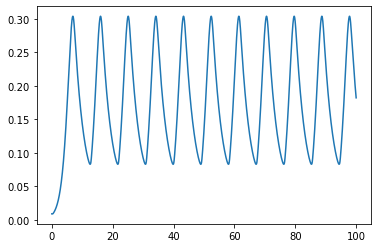

In [102]:
# 時間発展のプロット
plt.plot(t_list, y_list)

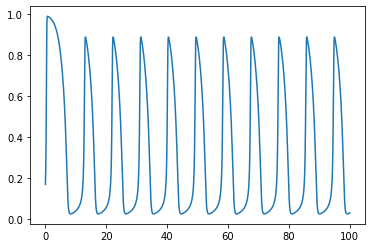

In [103]:
# 時間発展のプロット
plt.plot(t_list, z_list)

In [104]:
z=0.01
lamda =((1- z )/z)*(z*z+1/gamma)
# 時間の設定
dz = 0.01
zEnd = 1
iEnd = int((zEnd-z)/dz)

z_list = [z]
lamda_list = [lamda]

for i in range(2, iEnd):
    zz=dz*i
    lamda =((1- zz )/zz)*(zz*zz+1/gamma)
    
    z_list.append(zz)
    lamda_list.append(lamda)

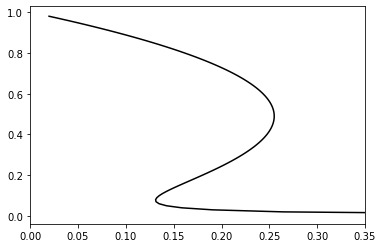

In [105]:
plt.plot(lamda_list, z_list, color="black")
plt.xlim(0,0.35)
plt.savefig("figCa.png", format="png", dpi=300)